In [ ]:
pip install xgboost

In [1]:
# 필요한 라이브러리 호출

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

In [2]:
# 데이터 로드

df = pd.read_csv('C:/myPyCode/data/dating.csv', encoding = 'utf-8')
df                

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,...,5.0,NaN,NaN,0.64,10.0,NaN,2.0,5.0,0.0,0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,...,4.0,4.0,NaN,0.71,10.0,NaN,4.0,4.0,0.0,0
8375,1,male,25.0,29.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,40.0,10.0,...,8.0,8.0,NaN,-0.46,10.0,NaN,6.0,5.0,0.0,0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,...,4.0,NaN,5.0,0.62,10.0,NaN,5.0,5.0,0.0,0


In [3]:
# 데이터 피쳐 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [4]:
df.describe()

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00000,8283.000000,8274.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,...,8028.000000,7666.000000,7311.000000,8220.000000,8277.000000,1800.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,0.87491,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,...,6.400598,6.777524,5.474559,0.196010,5.534131,5.570556,6.134087,5.207523,0.049856,0.164717
std,0.33084,3.566763,3.563648,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,...,1.953702,1.794055,2.156363,0.303539,1.734059,4.762569,1.841285,2.129565,0.282168,0.370947
min,0.00000,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,...,5.000000,6.000000,4.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,1.00000,26.000000,26.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,...,7.000000,7.000000,6.000000,0.210000,6.000000,4.000000,6.000000,5.000000,0.000000,0.000000
75%,1.00000,28.000000,28.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,...,8.000000,8.000000,7.000000,0.430000,7.000000,8.000000,7.000000,7.000000,0.000000,0.000000
max,1.00000,55.000000,55.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,10.000000,10.000000,8.000000,1.000000


In [5]:
# 종속변수는 match, 독립변수는 match외에 필요한 전부

# 소숫점 축약

pd.options.display.float_format = "{:.2f}".format

In [6]:
df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,...,7.00,6.00,5.00,0.14,3.00,2.00,7.00,6.00,0.00,0
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,...,8.00,5.00,6.00,0.54,3.00,2.00,7.00,5.00,1.00,0
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,...,8.00,5.00,7.00,0.16,3.00,2.00,7.00,NaN,1.00,1
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,...,7.00,6.00,8.00,0.61,3.00,2.00,7.00,6.00,0.00,1
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,...,7.00,6.00,6.00,0.21,3.00,2.00,6.00,6.00,0.00,1


In [7]:
# object 피쳐 종류

df.describe(include='O')

,gender,race,race_o
count,8378,8315,8305
unique,2,5,5
top,male,European/Caucasian-American,European/Caucasian-American
freq,4194,4727,4722


In [8]:
# 데이터 전처리
# 결측치

df.isnull().sum()

has_null                            0
gender                              0
age                                95
age_o                             104
race                               63
race_o                             73
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sincere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive_p

In [9]:
# subset으로 불필요한 변수 결측치 삭제

df = df.dropna(subset= ['pref_o_attractive','pref_o_sincere' ,'pref_o_intelligence'
                     , 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'
                     , 'attractive_important', 'sincere_important','intellicence_important'
                     , 'funny_important', 'ambtition_important','shared_interests_important'])

In [10]:
df.isnull().sum().sort_values()

has_null                            0
interests_correlate                 0
shared_interests_important          0
ambtition_important                 0
funny_important                     0
intellicence_important              0
sincere_important                   0
attractive_important                0
pref_o_shared_interests             0
pref_o_ambitious                    0
pref_o_funny                        0
match                               0
pref_o_sincere                      0
pref_o_attractive                   0
gender                              0
pref_o_intelligence                 0
race                                0
race_o                              0
importance_same_religion            0
importance_same_race                0
expected_happy_with_sd_people      22
age_o                              22
age                                22
attractive_partner                185
attractive_o                      185
like                              222
sincere_part

In [11]:
# 결측치 모두 -99로 채움

df.fillna(-99, inplace=True)

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\1789457935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(-99, inplace=True)


In [12]:
df.isnull().sum().sort_values() # 결측치 처리 완료

has_null                         0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive_partner               0
sincere_partner                  0
attractive_important             0
intelligence_partner             0
ambition_partner                 0
shared_interests_partner         0
interests_correlate              0
expected_happy_with_sd_people    0
expected_num_interested_in_me    0
like                             0
guess_prob_liked                 0
funny_partner                    0
met                              0
shared_interests_o               0
funny_o                          0
gender                           0
age                              0
age_o                            0
race                             0
race_o                           0
importance_same_race             0
importance_same_religion         0
ambitous_o          

In [13]:
df2 = df.copy()

In [14]:
# feature engineering 시작

df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match'],
      dtype='object')

In [15]:
# age 부터 처리

def age_gap(row):
    if row.age == -99: # 내 나이가 결측치
        return -99
    if row.age_o == -99: # 상대방 나이가 결측치
        return -99
    if row.gender == 'female': # 내가 여성인 경우 상대방 나이 - 내 나이
        return row.age_o - row.age
    if row.gender == 'male': # 내가 남성인 경우 내 나이 - 상대방 나이
        return row.age - row.age_o

In [16]:
# apply()함수 사용

df['age_gap'] = df.apply(age_gap, axis = 1)
df

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\1173882085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_gap'] = df.apply(age_gap, axis = 1)


,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,...,6.00,5.00,0.14,3.00,2.00,7.00,6.00,0.00,0,6.00
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,...,5.00,6.00,0.54,3.00,2.00,7.00,5.00,1.00,0,1.00
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,...,5.00,7.00,0.16,3.00,2.00,7.00,-99.00,1.00,1,1.00
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,...,6.00,8.00,0.61,3.00,2.00,7.00,6.00,0.00,1,2.00
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,...,6.00,6.00,0.21,3.00,2.00,6.00,6.00,0.00,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.00,24.00,European/Caucasian-American,European/Caucasian-American,1.00,1.00,10.00,15.00,...,6.00,-99.00,0.28,10.00,-99.00,4.00,4.00,0.00,0,1.00
8373,1,male,25.00,26.00,European/Caucasian-American,Latino/HispanicAmerican,1.00,1.00,10.00,10.00,...,-99.00,-99.00,0.64,10.00,-99.00,2.00,5.00,0.00,0,-1.00
8374,1,male,25.00,24.00,European/Caucasian-American,Other,1.00,1.00,50.00,20.00,...,4.00,-99.00,0.71,10.00,-99.00,4.00,4.00,0.00,0,1.00
8376,1,male,25.00,22.00,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.00,1.00,10.00,25.00,...,-99.00,5.00,0.62,10.00,-99.00,5.00,5.00,0.00,0,3.00


In [17]:
# age 분류 끝
# race(인종) 시작

# 함수를 새롭게 정의
def same_race(row):
    if row.race == 99 or row.race_o == -99:
        return -99 # 결측치는 -99
    if row.race == row.race_o:
        return 1 # 내 인종과 상대방의 인종이 같으면 1
    return -1 # 그외 불일치시 -1 (0 은 안됨)


In [18]:
df['same_race'] = df.apply(same_race, axis = 1)
df

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\2706060983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_race'] = df.apply(same_race, axis = 1)


,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,same_race
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,...,5.00,0.14,3.00,2.00,7.00,6.00,0.00,0,6.00,-1
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,...,6.00,0.54,3.00,2.00,7.00,5.00,1.00,0,1.00,-1
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,...,7.00,0.16,3.00,2.00,7.00,-99.00,1.00,1,1.00,1
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,...,8.00,0.61,3.00,2.00,7.00,6.00,0.00,1,2.00,-1
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,...,6.00,0.21,3.00,2.00,6.00,6.00,0.00,1,3.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.00,24.00,European/Caucasian-American,European/Caucasian-American,1.00,1.00,10.00,15.00,...,-99.00,0.28,10.00,-99.00,4.00,4.00,0.00,0,1.00,1
8373,1,male,25.00,26.00,European/Caucasian-American,Latino/HispanicAmerican,1.00,1.00,10.00,10.00,...,-99.00,0.64,10.00,-99.00,2.00,5.00,0.00,0,-1.00,-1
8374,1,male,25.00,24.00,European/Caucasian-American,Other,1.00,1.00,50.00,20.00,...,-99.00,0.71,10.00,-99.00,4.00,4.00,0.00,0,1.00,-1
8376,1,male,25.00,22.00,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.00,1.00,10.00,25.00,...,5.00,0.62,10.00,-99.00,5.00,5.00,0.00,0,3.00,-1


In [19]:
# 위 결합
df['same_race'] = df.apply(same_race, axis = 1)

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\2750740087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_race'] = df.apply(same_race, axis = 1)


In [20]:
df['same_race'].value_counts()

-1    4844
 1    3286
Name: same_race, dtype: int64

In [21]:
# 인종이 같았던 사람들의 동일 인종 선호도

def same_race_point(row):
    if row.same_race == -99:
        return -99
    return row.same_race * row.importance_same_race

In [22]:
df['same_race_point'] = df.apply(same_race_point, axis = 1)

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\125223578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_race_point'] = df.apply(same_race_point, axis = 1)


In [23]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'same_race',
       'same_race_point'],
      dtype='object')

In [24]:
# 선호도에 대한 변수들 정의

partner_important = df.columns[8:14]
partner_rate_me = df.columns[14:20]
my_important = df.columns[20:26]
my_rate_partner = df.columns[26:32]

In [25]:
# 평가용 변수 정의

new_label_partner = ['attractive_p', 'sincere_p','intelligence_p',
                   'funny_p', 'ambitous_p','shared_interests_p' ]
new_label_me =['attractive_m', 'sincere_m','intelligence_m',
                   'funny_m', 'ambitous_m','shared_interests_m' ]

In [26]:
#zip으로 연결

for i, j, k in zip(new_label_partner, partner_important, 
                   partner_rate_me):
    print(f"{i}&{j}&{k}")
    
for i, j, k in zip(new_label_me, my_important, 
                   my_rate_partner):
    print(f"{i}&{j}&{k}")

attractive_p&pref_o_attractive&attractive_o
sincere_p&pref_o_sincere&sincere_o
intelligence_p&pref_o_intelligence&intelligence_o
funny_p&pref_o_funny&funny_o
ambitous_p&pref_o_ambitious&ambitous_o
shared_interests_p&pref_o_shared_interests&shared_interests_o
attractive_m&attractive_important&attractive_partner
sincere_m&sincere_important&sincere_partner
intelligence_m&intellicence_important&intelligence_partner
funny_m&funny_important&funny_partner
ambitous_m&ambtition_important&ambition_partner
shared_interests_m&shared_interests_important&shared_interests_partner


In [27]:
df

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,same_race,same_race_point
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,...,0.14,3.00,2.00,7.00,6.00,0.00,0,6.00,-1,-2.00
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,...,0.54,3.00,2.00,7.00,5.00,1.00,0,1.00,-1,-2.00
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,...,0.16,3.00,2.00,7.00,-99.00,1.00,1,1.00,1,2.00
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,...,0.61,3.00,2.00,7.00,6.00,0.00,1,2.00,-1,-2.00
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,...,0.21,3.00,2.00,6.00,6.00,0.00,1,3.00,-1,-2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.00,24.00,European/Caucasian-American,European/Caucasian-American,1.00,1.00,10.00,15.00,...,0.28,10.00,-99.00,4.00,4.00,0.00,0,1.00,1,1.00
8373,1,male,25.00,26.00,European/Caucasian-American,Latino/HispanicAmerican,1.00,1.00,10.00,10.00,...,0.64,10.00,-99.00,2.00,5.00,0.00,0,-1.00,-1,-1.00
8374,1,male,25.00,24.00,European/Caucasian-American,Other,1.00,1.00,50.00,20.00,...,0.71,10.00,-99.00,4.00,4.00,0.00,0,1.00,-1,-1.00
8376,1,male,25.00,22.00,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.00,1.00,10.00,25.00,...,0.62,10.00,-99.00,5.00,5.00,0.00,0,3.00,-1,-1.00


In [28]:
def rating(row, importance, score):
    if(row[importance] ==-99)or (row[score]==-99):
        return -99
    return row[importance]*row[score]

In [29]:
for i, j, k in zip(new_label_partner, partner_important,
               partner_rate_me):
    
    df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\2128008910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)
C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\2128008910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)
C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\2128008910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [30]:
for i, j, k in zip(new_label_me, my_important,
               my_rate_partner):
    
    df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)

C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\4148772113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)
C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\4148772113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k), axis = 1)
C:\Users\임채원\AppData\Local\Temp\ipykernel_8508\4148772113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [31]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'same_race',
       'same_race_point', 'attractive_p', 'sincere_p', 'intelligence_p',
       'funny_p', 'ambitous_p', 'shared_interests_p', 'attractive_m',
       'sincere_

In [32]:
# dummies 사용
#  사용 주의
df = pd.get_dummies(df, columns = df.describe(include='O').columns,
                    drop_first=True)
df

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,shared_interests_m,gender_male,race_Black/AfricanAmerican,race_European/Caucasian-American,race_Latino/HispanicAmerican,race_Other,race_o_Black/AfricanAmerican,race_o_European/Caucasian-American,race_o_Latino/HispanicAmerican,race_o_Other
0,0,21.00,27.00,2.00,4.00,35.00,20.00,20.00,20.00,0.00,...,75.00,0,0,0,0,0,0,1,0,0
1,0,21.00,22.00,2.00,4.00,60.00,0.00,0.00,40.00,0.00,...,90.00,0,0,0,0,0,0,1,0,0
2,1,21.00,22.00,2.00,4.00,19.00,18.00,19.00,18.00,14.00,...,105.00,0,0,0,0,0,0,0,0,0
3,0,21.00,23.00,2.00,4.00,30.00,5.00,15.00,40.00,5.00,...,120.00,0,0,0,0,0,0,1,0,0
4,0,21.00,24.00,2.00,4.00,30.00,10.00,20.00,10.00,10.00,...,90.00,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,25.00,24.00,1.00,1.00,10.00,15.00,30.00,20.00,15.00,...,-99.00,1,0,1,0,0,0,1,0,0
8373,1,25.00,26.00,1.00,1.00,10.00,10.00,30.00,20.00,10.00,...,-99.00,1,0,1,0,0,0,0,1,0
8374,1,25.00,24.00,1.00,1.00,50.00,20.00,10.00,5.00,10.00,...,-99.00,1,0,1,0,0,0,0,0,1
8376,1,25.00,22.00,1.00,1.00,10.00,25.00,25.00,10.00,10.00,...,0.00,1,0,1,0,0,0,0,0,0


In [33]:
# 스케일링은 할 필요 없음

In [34]:
# 훈련셋, 시험셋 분리

from sklearn.model_selection import train_test_split

X = df.drop('match', axis = 1)
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state=10)

In [35]:
# 하이퍼 패러미터 시작
# 사용 도구 : 그리드 서치 cv

from sklearn.model_selection import GridSearchCV

In [36]:
parameter = {'learning_rate': [0.3], 'max_depth': [5], 'subsample':[0.5]
            , 'n_estimators' : [200]}

In [37]:
# 모델링
model = xgb.XGBClassifier()

In [38]:
gs_model = GridSearchCV(model, parameter, n_jobs=-1, scoring ='f1',
                        cv = 3)

In [39]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

# 에러
C:\Anaconda3\lib\site-packages\joblib\externals\loky\backend\resource_tracker.py in _send(self, cmd, name, rtype)
    202 
    203     def _send(self, cmd, name, rtype):
--> 204         msg = '{0}:{1}:{2}\n'.format(cmd, name, rtype).encode('ascii')
    205         if len(name) > 512:
    206             # posix guarantees that writes to a pipe of less than PIPE_BUF

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-23: ordinal not in range(128)

에러 수정

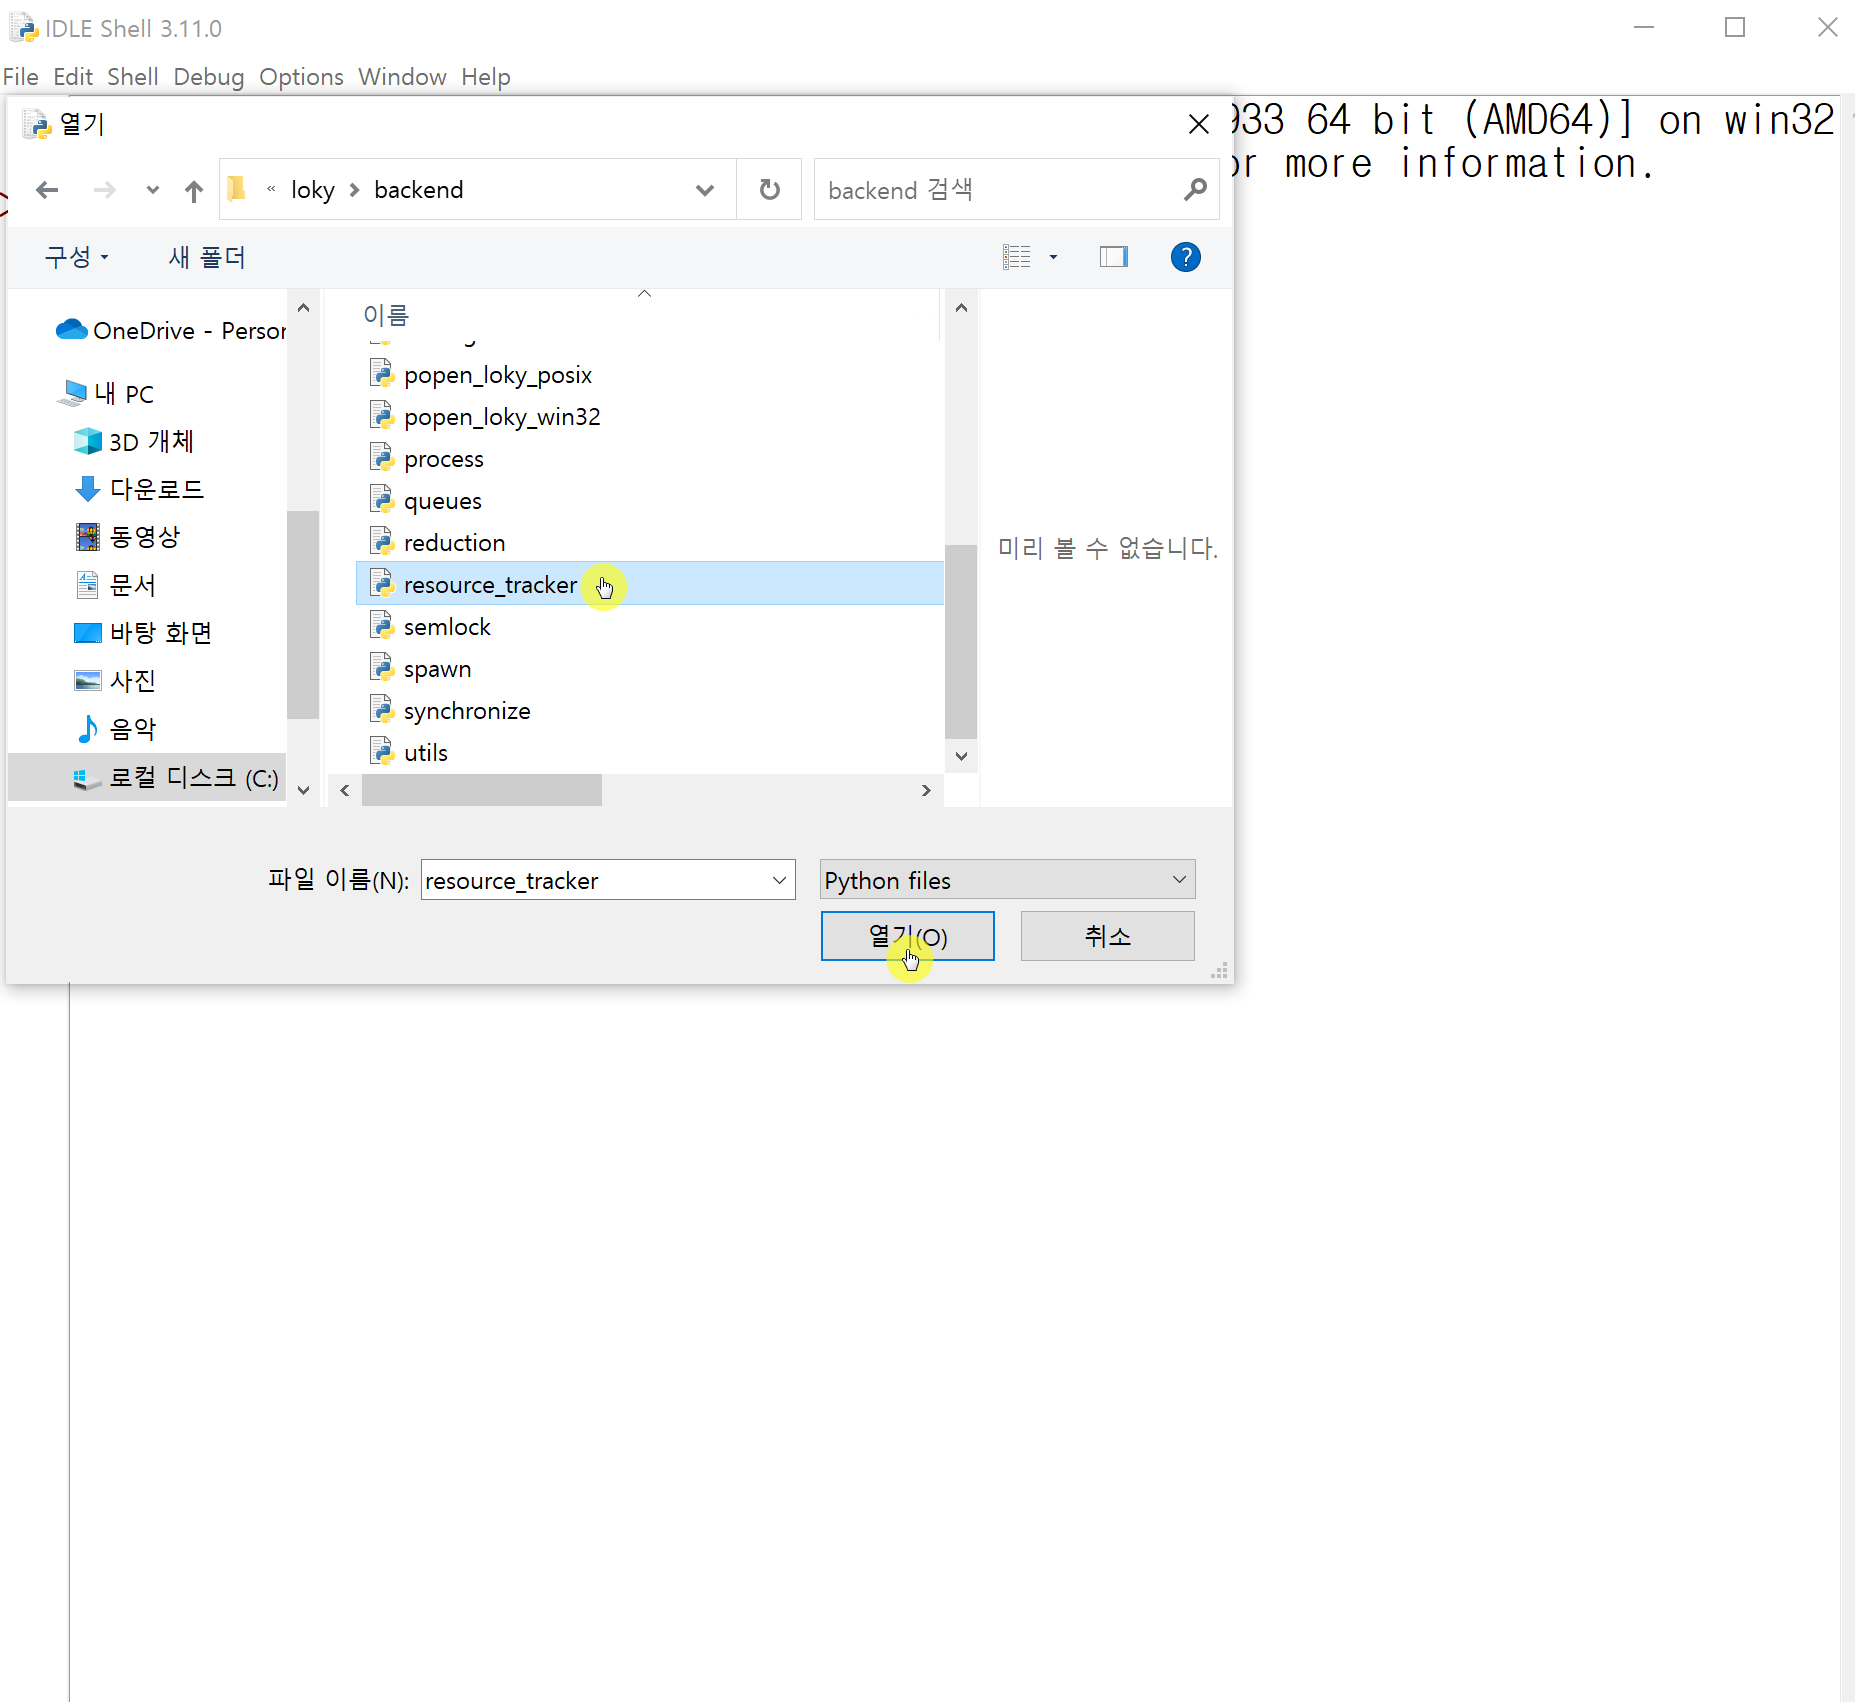

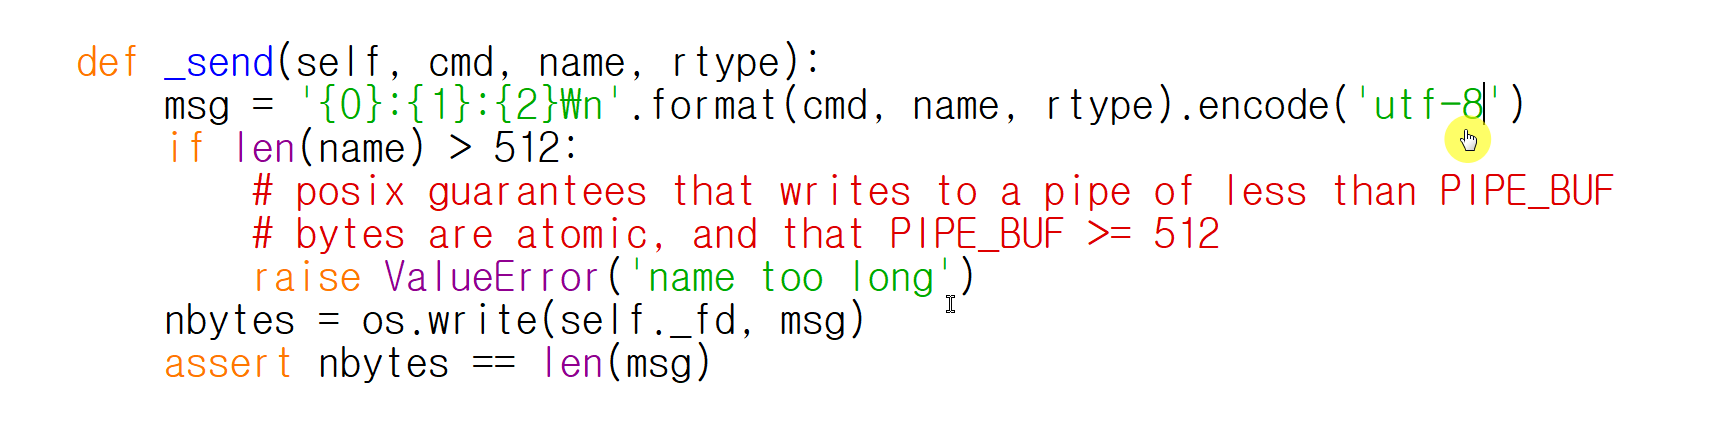

In [40]:
# 최적합 점수
gs_model.best_score_

0.45844602514247557

In [42]:
# 패러미터
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [43]:
# 예측값
pred = gs_model.predict(X_test)

In [50]:
# 예측 정확도 점수 확인
# 분류 리포트 확인
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [51]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))

accuracy_score : 0.8523985239852399
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1350
           1       0.59      0.43      0.50       276

    accuracy                           0.85      1626
   macro avg       0.74      0.68      0.70      1626
weighted avg       0.84      0.85      0.84      1626



In [59]:
# 중요 변수 확인

model = xgb.XGBClassifier(max_depth = 5,
                         n_estimators = 500, subsample = 0.5,
                         random_state = 10)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10, ...)

In [60]:
model.feature_importances_

array([0.01923965, 0.0151667 , 0.01203344, 0.01103397, 0.01539309,
       0.01664035, 0.01297218, 0.01434571, 0.01189115, 0.01185532,
       0.01653543, 0.03900231, 0.01395826, 0.01567459, 0.03930039,
       0.01158662, 0.02094776, 0.01786307, 0.01507503, 0.01593791,
       0.01255747, 0.01174872, 0.01225377, 0.02968891, 0.01187954,
       0.01010276, 0.01723526, 0.01542285, 0.01547487, 0.01251746,
       0.01395206, 0.01386102, 0.05553311, 0.02160599, 0.03963857,
       0.01462953, 0.00842365, 0.01214396, 0.01328781, 0.01256021,
       0.01430117, 0.01318108, 0.01427079, 0.01105677, 0.01205453,
       0.01313134, 0.01610176, 0.0111676 , 0.0122878 , 0.01403472,
       0.0119998 , 0.01075932, 0.01740985, 0.02917014, 0.0190813 ,
       0.02429383, 0.01638354, 0.0067505 , 0.03159371], dtype=float32)

In [61]:
feature_important = pd.DataFrame({'features':X_train.columns,
                                 'values':model.feature_importances_,})
feature_important
                                

,features,values
0,has_null,0.02
1,age,0.02
2,age_o,0.01
3,importance_same_race,0.01
4,importance_same_religion,0.02
5,pref_o_attractive,0.02
6,pref_o_sincere,0.01
7,pref_o_intelligence,0.01
8,pref_o_funny,0.01
9,pref_o_ambitious,0.01


In [62]:
# 소수점 축약

pd.options.display.float_format = "{:.4f}".format

In [63]:
feature_important

,features,values
0,has_null,0.0192
1,age,0.0152
2,age_o,0.0120
3,importance_same_race,0.0110
4,importance_same_religion,0.0154
5,pref_o_attractive,0.0166
6,pref_o_sincere,0.0130
7,pref_o_intelligence,0.0143
8,pref_o_funny,0.0119
9,pref_o_ambitious,0.0119


<AxesSubplot:xlabel='values', ylabel='features'>

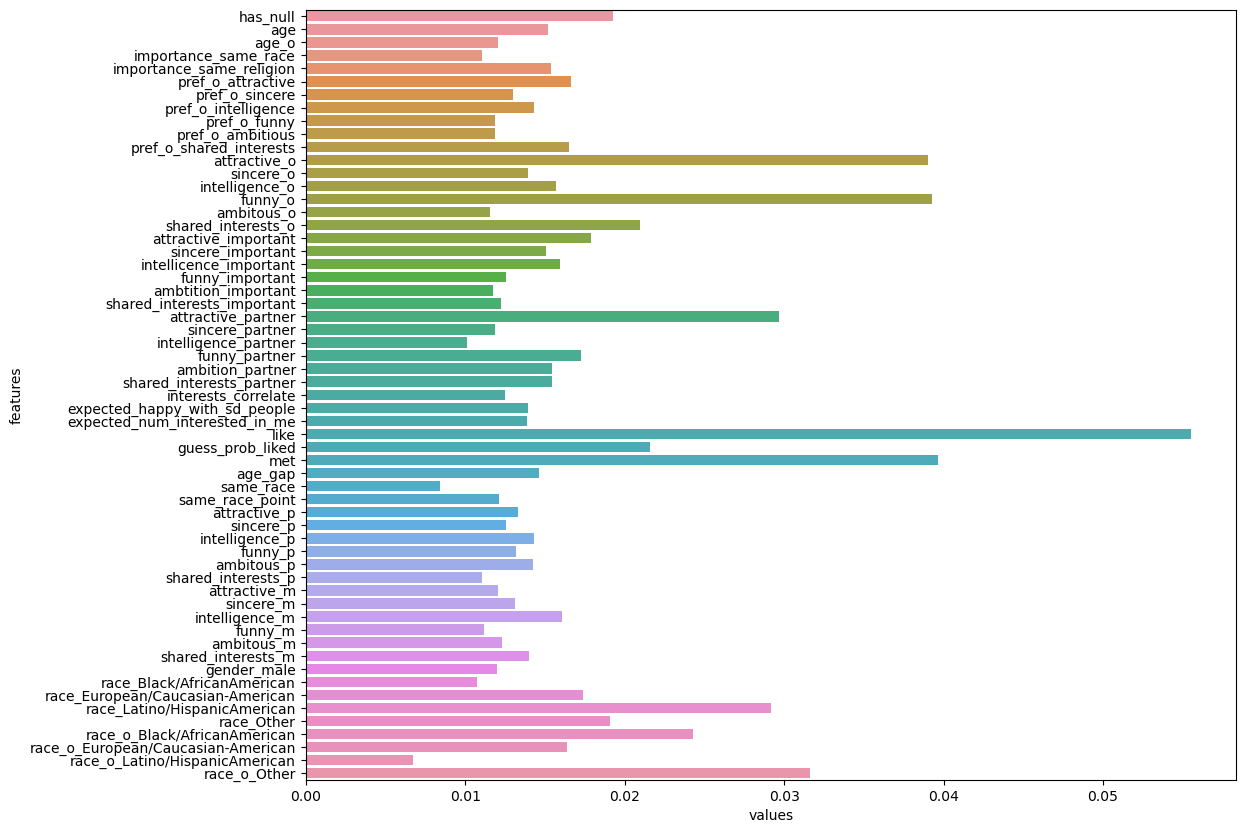

In [65]:
# 시각화

plt.figure(figsize=(12,10))
sns.barplot(x='values',y='features', data = feature_important)

<AxesSubplot:xlabel='values', ylabel='features'>

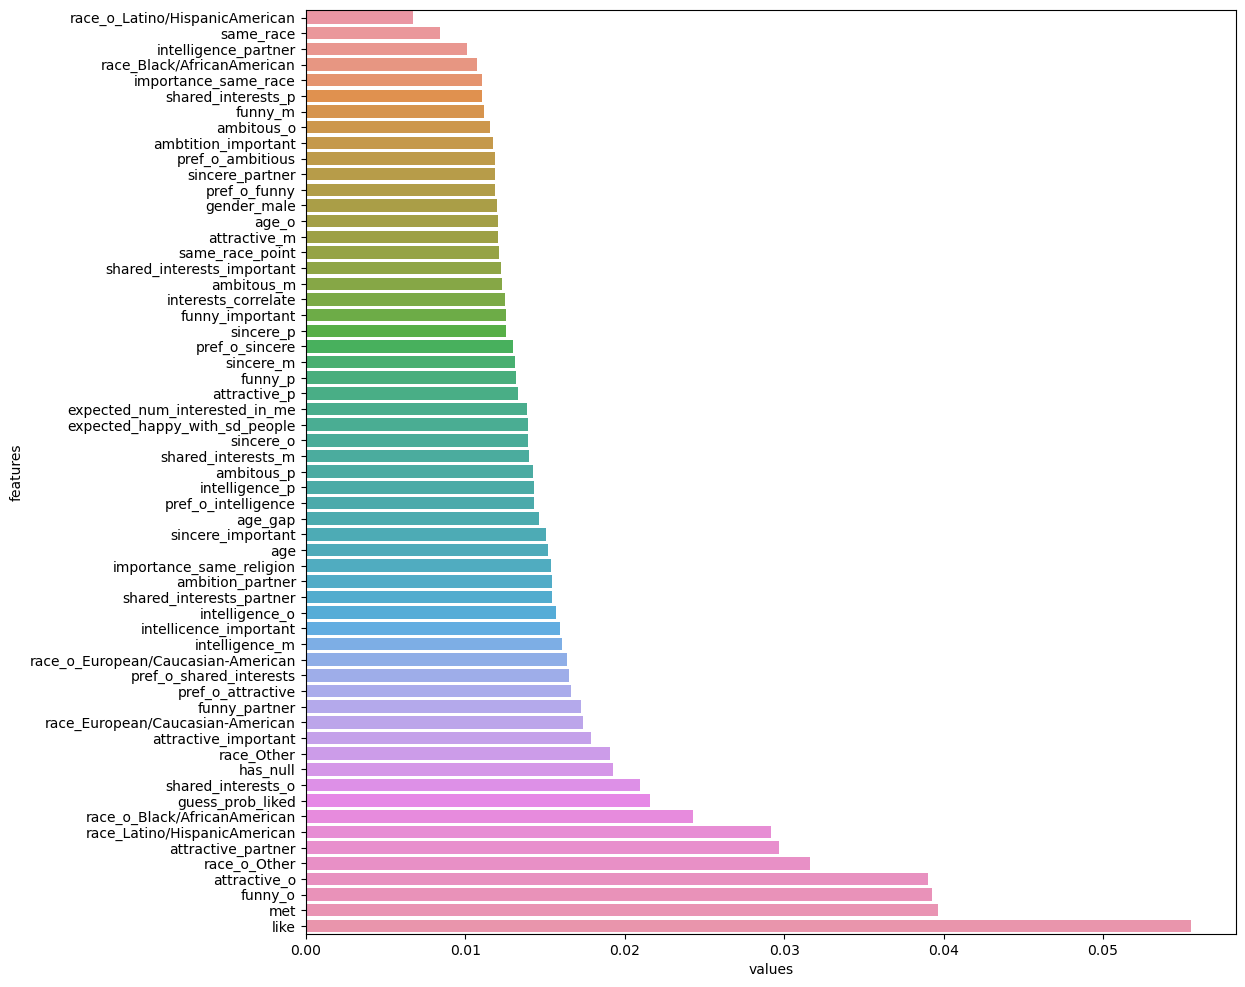

In [69]:
# 정렬순서 내림차순해서 시각화

plt.figure(figsize=(12,12))
sns.barplot(x='values',y='features', data = feature_important.sort_values(by = 'values', ascending=True))